# Лабораторная работа №2

## Реализация глубокой нейронной сети

В работе предлагается использовать набор данных _notMNIST_, который состоит из изображений размерностью 28×28 первых 10 букв латинского алфавита (_A_ ... _J_, соответственно). Обучающая выборка содержит порядка 500 тыс. изображений, а тестовая – около 19 тыс.

Данные можно скачать по ссылке:

* https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz (большой набор данных);

* https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz (маленький набор данных);

Описание данных на английском языке доступно по ссылке:
http://yaroslavvb.blogspot.sg/2011/09/notmnist-dataset.html

### Задание 1

Реализуйте полносвязную нейронную сеть с помощью библиотеки _TensorFlow_. В качестве алгоритма оптимизации можно использовать, например, стохастический градиент (_Stochastic Gradient Descent_, _SGD_). Определите количество скрытых слоев от 1 до 5, количество нейронов в каждом из слоев до нескольких сотен, а также их функции активации (кусочно-линейная, сигмоидная, гиперболический тангенс и т.д.).

In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
BASE_DIR = '/content/drive/My Drive/Colab Files/mo-2'

import sys

sys.path.append(BASE_DIR)

import os

os.chdir(BASE_DIR)

In [0]:
import pandas as pd

dataframe = pd.read_pickle("./large.pkl")

In [4]:
dataframe['data'].shape

(461946,)

In [5]:
! pip install tensorflow-gpu --pre --quiet

! pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 2.2.0rc3
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: absl-py, keras-preprocessing, termcolor, opt-einsum, grpcio, protobuf, google-pasta, tensorflow-estimator, wrapt, six, wheel, scipy, tensorboard, numpy, h5py, gast, astunparse
Required-by: 


In [0]:
import tensorflow as tf

In [0]:
import numpy as np

In [0]:
dataframe_test = dataframe.sample(frac = 0.1)

dataframe = dataframe.drop(dataframe_test.index)

In [9]:
x = np.asarray(list(dataframe['data']))[..., np.newaxis]

x = tf.keras.utils.normalize(x, axis = 1)

x.shape

(415751, 28, 28, 1)

In [10]:
x_test = np.asarray(list(dataframe_test['data']))[..., np.newaxis]

x_test = tf.keras.utils.normalize(x_test, axis = 1)

x_test.shape

(46195, 28, 28, 1)

In [0]:
IMAGE_DIM_0, IMAGE_DIM_1 = x.shape[1], x.shape[2]

In [12]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(dataframe['label'].astype('category').cat.codes.astype('int32'))

y.shape

(415751, 10)

In [13]:
y_test = to_categorical(dataframe_test['label'].astype('category').cat.codes.astype('int32'))

y_test.shape

(46195, 10)

In [0]:
LAYER_WIDTH = 5000

In [0]:
CLASSES_N = y.shape[1]

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

model = tf.keras.Sequential()

model.add(Reshape((IMAGE_DIM_0 * IMAGE_DIM_1,), input_shape = (IMAGE_DIM_0, IMAGE_DIM_1, 1)))
model.add(Dense(LAYER_WIDTH, activation = 'relu'))
model.add(Dense(LAYER_WIDTH, activation = 'sigmoid'))
model.add(Dense(LAYER_WIDTH, activation = 'tanh'))
model.add(Dense(LAYER_WIDTH, activation = 'elu'))
model.add(Dense(LAYER_WIDTH, activation = 'softmax'))
model.add(Dense(CLASSES_N))

In [0]:
def cat_cross_from_logits(y_true, y_pred):
    return tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits = True)

model.compile(optimizer = 'sgd',
              loss = cat_cross_from_logits,
              metrics = ['categorical_accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 5000)              3925000   
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_2 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_3 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_4 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5

In [0]:
VAL_SPLIT_RATE = 0.1

In [0]:
EPOCHS_N = 10

In [21]:
history = model.fit(x = x, y = y, epochs = EPOCHS_N, validation_split = VAL_SPLIT_RATE)

Epoch 1/10
11693/11693 [==============================] - 102s 9ms/step - loss: 2.2191 - categorical_accuracy: 0.1130 - val_loss: 4.8881 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
11693/11693 [==============================] - 102s 9ms/step - loss: 2.2036 - categorical_accuracy: 0.1121 - val_loss: 5.5146 - val_categorical_accuracy: 0.0000e+00
Epoch 3/10
11693/11693 [==============================] - 102s 9ms/step - loss: 2.2018 - categorical_accuracy: 0.1131 - val_loss: 5.8773 - val_categorical_accuracy: 0.0000e+00
Epoch 4/10
11693/11693 [==============================] - 102s 9ms/step - loss: 2.2010 - categorical_accuracy: 0.1135 - val_loss: 6.1279 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
11693/11693 [==============================] - 102s 9ms/step - loss: 2.2007 - categorical_accuracy: 0.1128 - val_loss: 6.3155 - val_categorical_accuracy: 0.0000e+00
Epoch 6/10
11693/11693 [==============================] - 102s 9ms/step - loss: 2.2005 - categorical_accuracy: 0.1125 - 

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7, 8.27

sns.set()

sns.set_palette(sns.color_palette('hls'))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


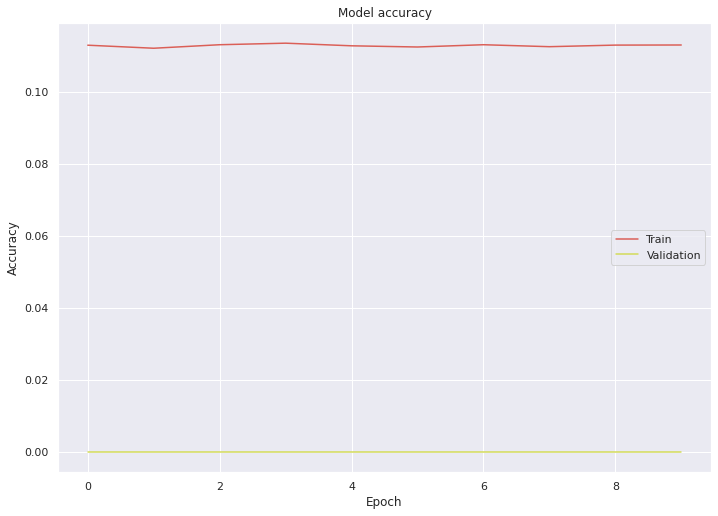

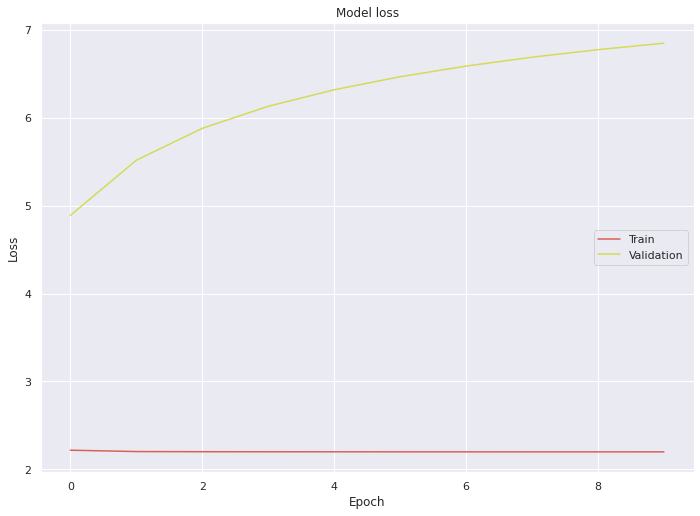

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'right')
plt.show()

In [25]:
results = model.evaluate(x_test, y_test)

print('Test loss, test accuracy:', results)

1444/1444 [==============================] - 5s 3ms/step - loss: 2.6747 - categorical_accuracy: 0.1050
Test loss, test accuracy: [2.6747310161590576, 0.10496807098388672]


### Задание 2

Как улучшилась точность классификатора по сравнению с логистической регрессией?

Стало хуже &mdash; на тестовой выборке точность составила 10%. Похоже, что данная модель совершенно не подходит для решения этой задачи.

### Задание 3

Используйте регуляризацию и метод сброса нейронов (_dropout_) для борьбы с переобучением. Как улучшилось качество классификации?

In [0]:
REG_RATE = 0.001

In [0]:
from tensorflow.keras.regularizers import l2

l2_reg = l2(REG_RATE)

In [0]:
DROPOUT_RATE = 0.2

In [0]:
from tensorflow.keras.layers import Dropout

dropout_layer = Dropout(DROPOUT_RATE)

In [0]:
model_2 = tf.keras.Sequential()

model_2.add(Reshape((IMAGE_DIM_0 * IMAGE_DIM_1,), input_shape = (IMAGE_DIM_0, IMAGE_DIM_1, 1)))
model_2.add(Dense(LAYER_WIDTH, activation = 'relu', kernel_regularizer = l2_reg))
model_2.add(dropout_layer)
model_2.add(Dense(LAYER_WIDTH, activation = 'sigmoid', kernel_regularizer = l2_reg))
model_2.add(dropout_layer)
model_2.add(Dense(LAYER_WIDTH, activation = 'tanh', kernel_regularizer = l2_reg))
model_2.add(dropout_layer)
model_2.add(Dense(LAYER_WIDTH, activation = 'sigmoid', kernel_regularizer = l2_reg))
model_2.add(dropout_layer)
model_2.add(Dense(LAYER_WIDTH, activation = 'relu', kernel_regularizer = l2_reg))
model_2.add(dropout_layer)
model_2.add(Dense(CLASSES_N))

In [0]:
model_2.compile(optimizer = 'sgd',
                loss = cat_cross_from_logits,
                metrics = ['categorical_accuracy'])

In [32]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5000)              3925000   
_________________________________________________________________
dropout (Dropout)            (None, 5000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_8 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_9 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_10 (Dense)             (None, 5000)             

In [33]:
history_2 = model_2.fit(x = x, y = y, epochs = EPOCHS_N, validation_split = VAL_SPLIT_RATE)

Epoch 1/10
11693/11693 [==============================] - 210s 18ms/step - loss: 19.2714 - categorical_accuracy: 0.1146 - val_loss: 19.8313 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
11693/11693 [==============================] - 210s 18ms/step - loss: 12.8747 - categorical_accuracy: 0.1274 - val_loss: 17.0186 - val_categorical_accuracy: 0.0000e+00
Epoch 3/10
11693/11693 [==============================] - 210s 18ms/step - loss: 8.3172 - categorical_accuracy: 0.3775 - val_loss: 13.3244 - val_categorical_accuracy: 0.0000e+00
Epoch 4/10
11693/11693 [==============================] - 210s 18ms/step - loss: 5.6690 - categorical_accuracy: 0.4852 - val_loss: 11.4049 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
11693/11693 [==============================] - 210s 18ms/step - loss: 4.0415 - categorical_accuracy: 0.5333 - val_loss: 9.9179 - val_categorical_accuracy: 0.0000e+00
Epoch 6/10
11693/11693 [==============================] - 209s 18ms/step - loss: 3.0223 - categorical_accurac

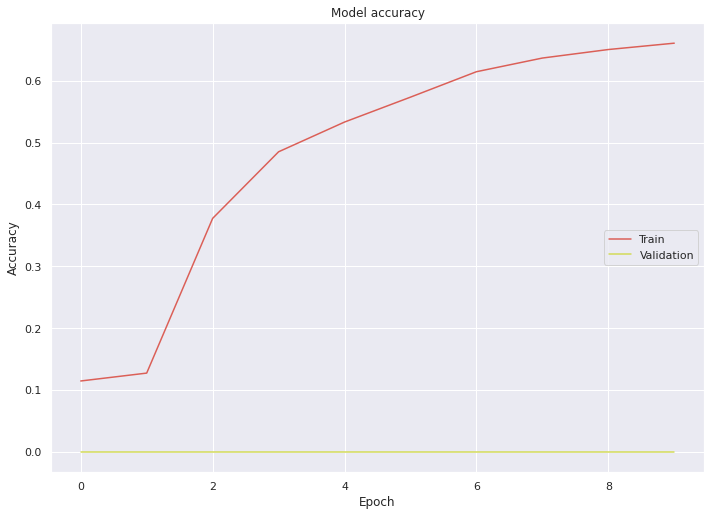

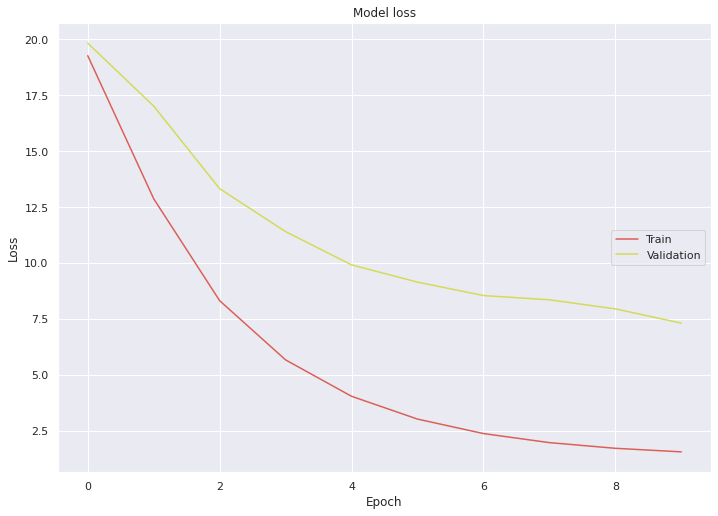

In [34]:
plt.plot(history_2.history['categorical_accuracy'])
plt.plot(history_2.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'right')
plt.show()

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'right')
plt.show()

In [35]:
results_2 = model_2.evaluate(x_test, y_test)

print('Test loss, test accuracy:', results_2)

1444/1444 [==============================] - 8s 6ms/step - loss: 2.0421 - categorical_accuracy: 0.6249
Test loss, test accuracy: [2.042070150375366, 0.6248944401741028]


Регуляризация и сброс нейронов значительно помогли &mdash; модель показывает 62% точности на тестовой выборке.

### Задание 4

Воспользуйтесь динамически изменяемой скоростью обучения (_learning rate_). Наилучшая точность, достигнутая с помощью данной модели составляет 97.1%. Какую точность демонстрирует Ваша реализованная модель?

In [36]:
from tensorflow.keras.optimizers import SGD

dyn_lr_sgd = SGD(lr = 0.01, momentum = 0.9)

model_2.compile(optimizer = dyn_lr_sgd,
                loss = cat_cross_from_logits,
                metrics = ['categorical_accuracy'])

history_3 = model_2.fit(x = x, y = y, epochs = EPOCHS_N, validation_split = VAL_SPLIT_RATE)

Epoch 1/10
11693/11693 [==============================] - 237s 20ms/step - loss: 1.3790 - categorical_accuracy: 0.6511 - val_loss: 6.8754 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
11693/11693 [==============================] - 237s 20ms/step - loss: 1.0942 - categorical_accuracy: 0.7466 - val_loss: 6.3502 - val_categorical_accuracy: 0.0000e+00
Epoch 3/10
11693/11693 [==============================] - 237s 20ms/step - loss: 1.0778 - categorical_accuracy: 0.7529 - val_loss: 6.7014 - val_categorical_accuracy: 0.0000e+00
Epoch 4/10
11693/11693 [==============================] - 237s 20ms/step - loss: 1.0749 - categorical_accuracy: 0.7540 - val_loss: 7.1483 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
11693/11693 [==============================] - 237s 20ms/step - loss: 1.0698 - categorical_accuracy: 0.7556 - val_loss: 7.1391 - val_categorical_accuracy: 0.0000e+00
Epoch 6/10
11693/11693 [==============================] - 237s 20ms/step - loss: 1.0231 - categorical_accuracy: 0.7

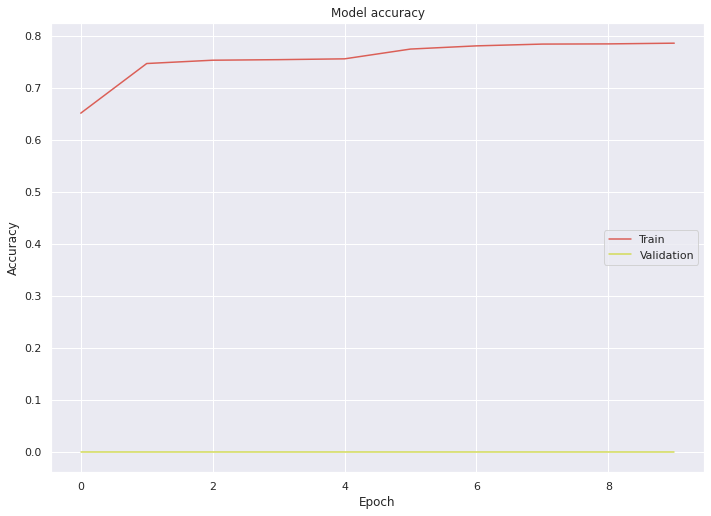

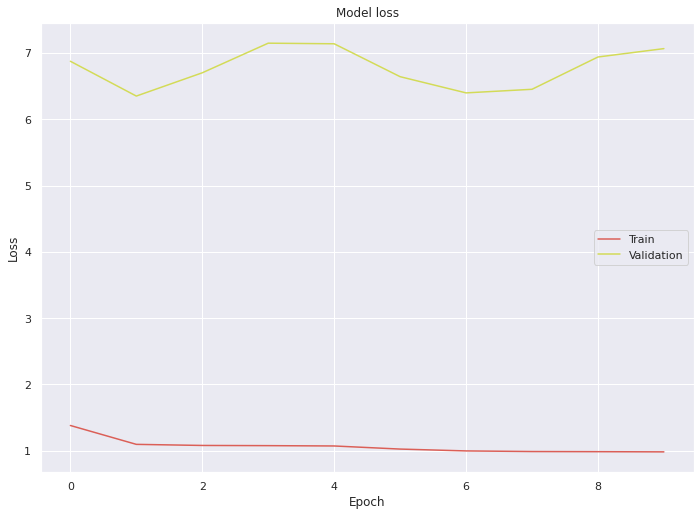

In [38]:
plt.plot(history_3.history['categorical_accuracy'])
plt.plot(history_3.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'right')
plt.show()

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'right')
plt.show()

In [39]:
results_3 = model_2.evaluate(x_test, y_test)

print('Test loss, test accuracy:', results_3)

1444/1444 [==============================] - 8s 6ms/step - loss: 1.5414 - categorical_accuracy: 0.7253
Test loss, test accuracy: [1.5414141416549683, 0.7252733111381531]


Динамически изменяемая скорость обучения улучшила результат &mdash; 72% на тестовой выборке.

Можно сделать вывод, что модель с полносвязными слоями может использоваться для решения задачи распознавания изображений, однако она очевидно не является наилучшей.